In diesem Notebook analysieren wir Datensätze, um Ausreißer zu identifizieren und die positiven und negativen Korrelationen zwischen Variablen mit Hilfe des Pearson-Korrelationskoeffizienten zu bewerten.

# Syllabus

Analyze datasets to identify outliers and evaluate negative and positive correlations using Pearson’s R coefficient.

---
# Definitionen

Wenn man einen Datensatz analysiert, kann man durch die Identifikation von Ausreißern sicherstellen, dass diese den Korrelationskoeffizienten nicht verzerren, und anschließend Pearson’s R nutzen, um die Stärke und Richtung der Beziehung zwischen zwei Variablen zu bestimmen. 

## Ausreißer
  - Datenpunkte, die deutlich von anderen Werten abweichen
  - sie können auf ungewöhnliche Ereignisse hinweisen, Fehler in der Datenerfassung oder auf interessante Phänomene, die näher untersucht werden sollten.
  - es gibt verschiedene Methoden, um Ausreißer zu erkennen
    - z.B. visuelle Inspektion durch Boxplots, oder
    - numerische Methoden wie Z-Wert oder der IQR (Interquartilsabstand)

<br>

## Korrelationen

  - die Korrelation beschreibt, wie zwei Variablen miteinander zusammenhängen
  - es gibt positive und negative Korrelationen:
    - **Positive Korrelation**:
      - wenn eine Variable steigt, steigt auch die andere.
      - Beispiel: Je höher die Temperatur, desto mehr Eis wird verkauft.
    - **Negative Korrelation**:
      - wenn eine Variable steigt, sinkt die andere.
      - Beispiel: Je höher die Außentemperatur, desto geringer der Heizverbrauch.

<br>

## Pearson’s R (Pearson-Korrelationskoeffizient)
- oft als $r$ bezeichnet
- beschreibt **wie stark** zwei Variablen linear miteinander zusammenhängen
  - bedeutet: misst die Stärke und Richtung eines linearen Zusammenhangs
- nimmt Werte zwischen -1 und 1 an:
    -  **$r = +1$** --> perfekter positiver linearer Zusammenhang (je höher $X$, desto höher $Y$)
    -  **$r = -1$** --> perfekter negativer linearer Zusammenhang (je höher $X$, desto niedriger $Y$)
    -  **$r = 0$** --> kein linearer Zusammenhang zwischen $X$ und $Y$

Der Pearson-Koeffizient ist jedoch nur sinnvoll, wenn die Beziehung zwischen den Variablen linear ist und die Daten normalverteilt sind. Er ist anfällig für Ausreißer, weshalb es wichtig ist, Ausreißer vor der Analyse zu erkennen.

<br>

Wenn man also einen Datensatz analysiert, kann man durch die Identifikation von Ausreißern sicherstellen, dass diese den Korrelationskoeffizienten nicht verzerren, und anschließend Pearson’s R nutzen, um die Stärke und Richtung der Beziehung zwischen zwei Variablen zu bestimmen. 


---
# Identifizieren von Ausreißern
Wir verwenden Boxplots, um potenzielle Ausreißer in unseren Daten zu identifizieren. Ausreißer sind Datenpunkte, die weit von den meisten anderen Beobachtungen entfernt sind.

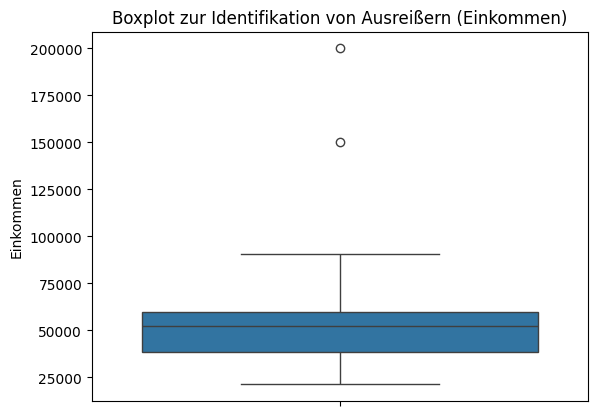

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Beispiel-Daten
np.random.seed(42)
data = {
    'Alter': np.random.normal(35, 10, 100),
    'Einkommen': np.random.normal(50000, 15000, 100),
    'Arbeitsstunden_pro_Woche': np.random.normal(40, 5, 100)
}

# Hinzufügen von Ausreißern
data['Einkommen'][98] = 150000  # großer Ausreißer im Einkommen
data['Einkommen'][99] = 200000  # weiterer großer Ausreißer
df = pd.DataFrame(data)

# Boxplot zur Identifikation von Ausreißern
sns.boxplot(data=df['Einkommen'])
plt.title('Boxplot zur Identifikation von Ausreißern (Einkommen)')
plt.show()

- der Boxplot zeigt die Verteilung des Einkommens
- die Ausreißer sind die Punkte, die weit vom Rest der Daten entfernt sind
  - meist mehr als 1,5-fache des IQA

---
# Analyse der Korrelationen mit Pearson's R

- der Pearson-Korrelationskoeffizient misst die lineare Beziehung zwischen zwei Variablen
<br>

- ein Wert von `1` bedeutet eine **perfekte positive Korrelation**
- ein Wert von `-1` bedeutet eine **perfekte negative Korrelation**
- ein Wert von `0` bedeutet **keine Korrelation**

In [3]:
# Berechnung der Pearson-Korrelation
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,Alter,Einkommen,Arbeitsstunden_pro_Woche
Alter,1.000000,-0.090885,0.190840
Einkommen,-0.090885,1.000000,0.045828
Arbeitsstunden_pro_Woche,0.190840,0.045828,1.000000


## Korrelationsmatrix

- der Output zeigt eine **Korrelationsmatrix**
- das Beispiel zeigt die **Stärke der linearen Beziehung zwischen den Variablen Alter, Einkommen und Arbeitsstunden**
- ist eine tabellarische Darstellung, die die Korrelationen zwischen mehreren Variablen gleichzeitig zeigt
- sie ist besonders nützlich, wenn man die Beziehungen zwischen mehreren Variablen in einem Datensatz untersuchen möchte
- jede Zelle in der Matrix zeigt den **Korrelationskoeffizienten** zwischen zwei Variablen an
  - oft verwendet man dafür den **Pearson-Korrelationskoeffizienten**
- die Diagonale der Matrix enthält immer den Wert `1`, da eine Variable perfekt mit sich selbst korreliert (Autokorrelation)




## Scatterplot zur Visualisierung der Korrelation
Wir visualisieren die Korrelation zwischen Einkommen und Arbeitsstunden mit einem Scatterplot.

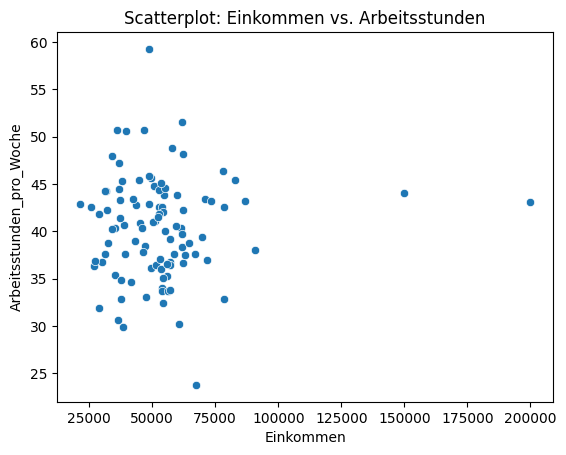

In [6]:
# Scatterplot der Korrelation zwischen Einkommen und Arbeitsstunden
sns.scatterplot(x=df['Einkommen'], y=df['Arbeitsstunden_pro_Woche'])
plt.title('Scatterplot: Einkommen vs. Arbeitsstunden')
plt.show()

Hier ist ein vollständiges Beispiel in Python, das zeigt, wie du Ausreißer in einem Datensatz identifizieren und den Pearson-Korrelationskoeffizienten verwenden kannst, um die Korrelation zwischen zwei Variablen zu bewerten. In diesem Beispiel verwenden wir die `pandas`, `numpy`, `matplotlib`, `seaborn` und `scipy` Bibliotheken.

### Beispielcode:

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Datensatz erstellen
np.random.seed(42)
# Erstellen von zwei Variablen mit einer positiven Korrelation
x = np.random.normal(50, 10, 100)  # Normalverteilung mit Mittelwert 50 und Standardabweichung 10
y = 2 * x + np.random.normal(0, 10, 100)  # y ist linear abhängig von x, plus etwas Rauschen

# Ausreißer hinzufügen
x_with_outliers = np.append(x, [120, 130, 140])  # Ausreißer für x
y_with_outliers = np.append(y, [20, 200, 250])   # Ausreißer für y

# DataFrame erstellen
df = pd.DataFrame({'x': x_with_outliers, 'y': y_with_outliers})

# 2. Daten visualisieren
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df)
plt.title('Streudiagramm der Daten mit Ausreißern')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3. Ausreißer identifizieren mit Z-Score
z_scores = np.abs(stats.zscore(df))
ausreißer = (z_scores > 3).any(axis=1)
print("Ausreißer gefunden an den Positionen:", np.where(ausreißer)[0])

# Ausreißer markieren
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df, label='Datenpunkte')
sns.scatterplot(x=df[ausreißer]['x'], y=df[ausreißer]['y'], color='red', label='Ausreißer')
plt.title('Ausreißer-Markierung')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 4. Pearson-Korrelation berechnen
pearson_r, p_value = stats.pearsonr(df['x'], df['y'])
print(f"Pearson-Korrelation mit Ausreißern: {pearson_r:.2f}, p-Wert: {p_value:.2f}")

# 5. Pearson-Korrelation ohne Ausreißer berechnen
df_clean = df[~ausreißer]  # Daten ohne Ausreißer
pearson_r_clean, p_value_clean = stats.pearsonr(df_clean['x'], df_clean['y'])
print(f"Pearson-Korrelation ohne Ausreißer: {pearson_r_clean:.2f}, p-Wert: {p_value_clean:.2f}")
```

### Erklärung des Codes:

1. **Datensatz erstellen**: Wir generieren zwei Variablen `x` und `y`, die eine positive Korrelation aufweisen. Wir fügen dann einige Ausreißer hinzu, um die Analyse herausfordernder zu gestalten.

2. **Daten visualisieren**: Ein Streudiagramm zeigt die Beziehung zwischen `x` und `y`, wobei Ausreißer im Datensatz zu sehen sind.

3. **Ausreißer identifizieren**: Wir verwenden den Z-Score, um Ausreißer zu identifizieren. Ein Z-Score größer als 3 wird häufig als Hinweis auf einen Ausreißer angesehen. Die Positionen der gefundenen Ausreißer werden ausgegeben.

4. **Ausreißer markieren**: Ein weiteres Streudiagramm zeigt die Datenpunkte mit markierten Ausreißern.

5. **Pearson-Korrelation berechnen**: Der Pearson-Korrelationskoeffizient wird sowohl mit als auch ohne Ausreißer berechnet. Der Korrelationskoeffizient und der p-Wert werden ausgegeben.

### Erwartete Ausgabe:
- Im ersten Streudiagramm kannst du die Beziehung zwischen `x` und `y` sehen.
- Die zweite Visualisierung zeigt die Datenpunkte und hebt die Ausreißer hervor.
- Die Berechnung des Pearson-Korrelationskoeffizienten zeigt, wie stark die Ausreißer die Korrelation beeinflussen. Du wirst wahrscheinlich feststellen, dass die Korrelation ohne Ausreißer höher ist.

Wenn du weitere Anpassungen oder Erklärungen benötigst, lass es mich wissen!